# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0



## Questions
### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.shape

(400, 4)

** Answer: **
    There are 400 observations

### Question 2. Create a summary table

In [4]:
#function 
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


### Question 3. Why would GRE have a larger STD than GPA?

** Answer: **  
Change the MIN, MAX and MEAN of GPA and GRE to the same scale:

|  |MIN|MEAN|MAX|
| :---: | :---: | :---: | :---: |
| GRE| 27.7| 73.5| 100|
| GPA| 56.5| 84.75| 100|

The different between MIN to MEAN and MAX to MEAN of GRE is larger than GPA, and therefore GRE shows a wider spread of dataset compare to GPA, as a result STD of GRE is larger than GPA.

**teacher ans: the range of GRE is higher than GPA **

### Question 4. Drop data points with missing data


In [5]:
print 'Before dropping missing data'
print df_raw.count()
df_dropNA = df_raw.dropna()
print '\nAfter dropping missing data'
print df_dropNA.count()
# we dropped 3 observations

Before dropping missing data
admit       400
gre         398
gpa         398
prestige    399
dtype: int64

After dropping missing data
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [6]:
# we can use .isnull() function to check if the dataset still contain missing data
print df_dropNA[df_dropNA['gre'].isnull()]
print df_dropNA[df_dropNA['gpa'].isnull()]
print df_dropNA[df_dropNA['prestige'].isnull()]

## teacher ans: just do a df.count()

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


### Question 6. Create box plots for GRE and GPA

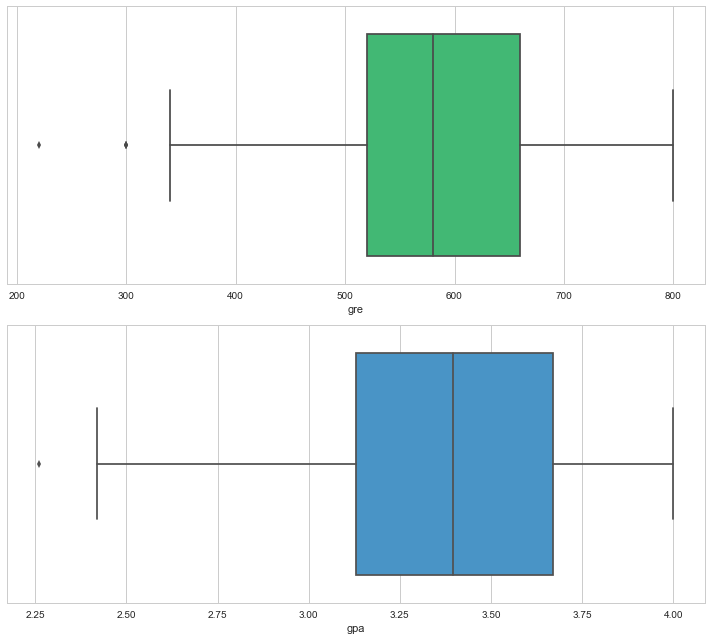

In [7]:
plt.rcParams['figure.figsize']=(10,9)

# boxplot 1
# box plots for GRE
plt.subplot(2,1,1)
sns.boxplot(df_raw.gre, color='#2ecc71')

#boxplot 2 
# box plot for GPA
plt.subplot(2,1,2)
sns.boxplot(df_raw.gpa, color='#3498db')

plt.tight_layout()
plt.show()

### Question 7. What do thess plots show?

** Answer: ** 
+ Both are asymmetric.
+ There are some outliers in GRE and GPA.
+ In the GRE boxplot, the size of the box to the left of the median is shorter than the size to the right of the median, which means the students with lower GRE are closer together than the students with higher GRE.
+ In the GPA boxplot, the size of two boxes that split by the medain are pretty much the same.

** TEACHER ANS: max, min , median , 25%, 75%, MAX **

### Question 8. Describe each distribution 

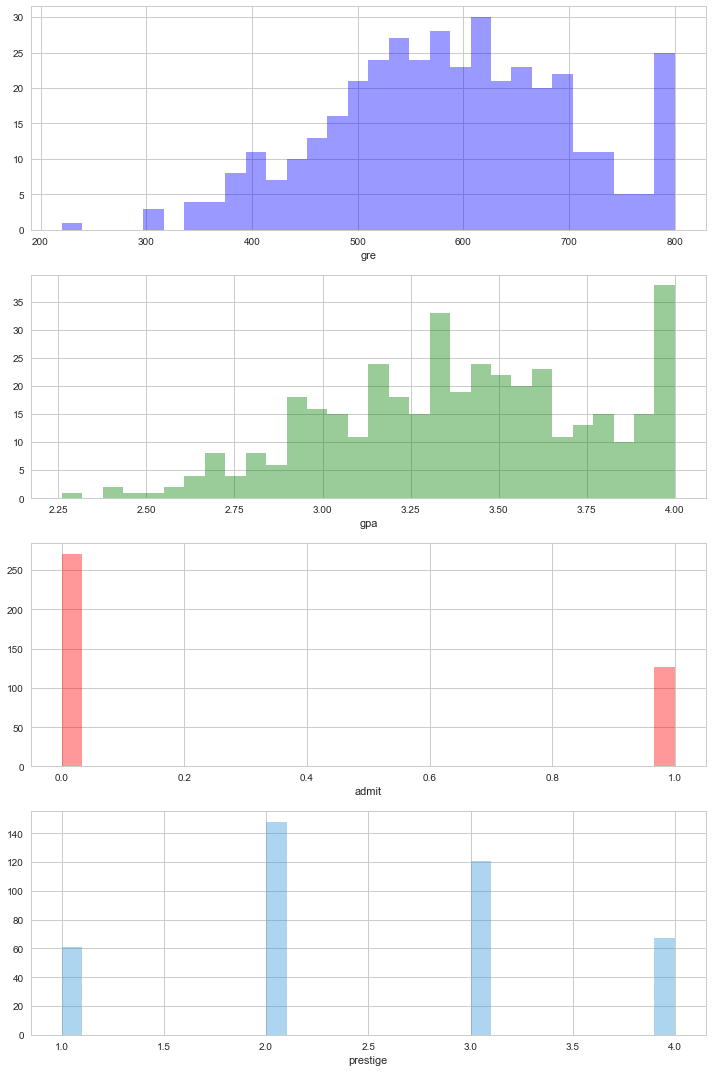

Kurtosis:
admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

Skewness:
admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64


In [8]:
# plot the distribution of each variable 
df = df_raw.dropna()
bins = 30
plt.rcParams['figure.figsize']=(10,15)

#GRE histogram
plt.subplot(4,1,1)
sns.distplot(df.gre,bins=bins,color='blue',kde=False)

#GPA histogram
plt.subplot(4,1,2)
sns.distplot(df.gpa,bins=bins,color='green',kde=False)

#Admit histogram
plt.subplot(4,1,3)
sns.distplot(df.admit,bins=bins,color='red',kde=False)

#Prestige histogram
plt.subplot(4,1,4)
sns.distplot(df.prestige,bins=bins,color='#3498db',kde=False)

plt.tight_layout()
plt.show()

print "Kurtosis:" 
print (df_raw.kurt())

print "\nSkewness:" 
print (df_raw.skew())

**Answer : ** 
+ Distribution of GRE is skewed left.
+ Distribution of GPA is skewed left and there is a clear peak at value 4.
+ Admit only contain 2 values (0 and 1), observations with value 0 is more than 1
+ Prestige contain 4 values (from 1-4), there are more students with prestige 2 than the other 3 prestige.

** if normal distribution is from 1-100, in the above case, the range is just fomr 1-80, therefor those student from 80-100 are push to the end, so there are high number of student at the tail of the distribution. **

### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

** Answer: **  
That would not meet the requirement, as from the histograms above both GRE and GPA are left-skewed (negative skewness)

**ans: GPA and GRE are skewed toward the upper ranges **

### Question 10.  Does this distribution need correction? If so, why? How? 

** Answer: **     
+ Yes, because its quit hard to see any pattern and its left-skewed.
+ We could use log transformations to reduce skew.

**ans: no need to correct anything, though slightly skewed**

### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


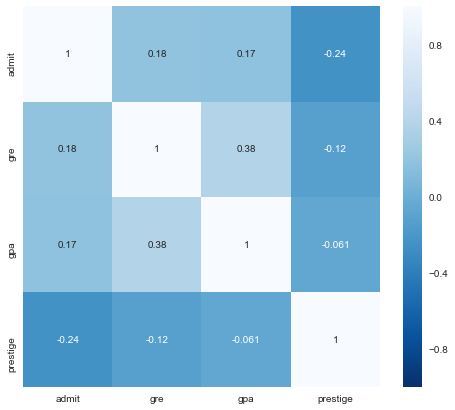

In [9]:
# create a correlation matrix for the data
print df.corr()

# visualize the matrix using heatmap
plt.rcParams['figure.figsize']=(8,7)
sns.heatmap(df.corr(), cmap="Blues_r", annot=True)

**Answer: **  
Variables are potentially colinear:
+ Admit and Prestige 
+ GRE and GPA


### Question 12. What did you find?

**Answer: **
+ A weak negative relationship between admit and prestige 
+ A moderate positive relationship between gre and gpa 

** Colinearity is not a concern here. **

### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

**Answer: **  

We can use some statistical models (e.g Logistic Regression) to estimate the associatione between grad school admissions rates and prestige of undergraduate schools.

+ Interpreting Model Coefficients to check if there are postive or negative association
+ Use hypothesis testing and p-value to decide whether there is a relationship 

** ans: **
** DO a linear regression [admit = 1] ~ prestige -> should be negative **
+ ** Do a crude analysis with the following model P(admit =1)  =  alpha + beta(prestige) **
+ ** Repeat controlling for GRE and GPA **

### Question 14. What is your hypothesis? 

** Answer: **
+ ** null hypothesis **: There are no association between grad school admissions rates and prestige of undergraduate 
+ ** alternative hypothesis :** There is a association between grad school admissions rates and prestige of undergraduate 

** ans **  
** students who attended a more prestigious undergraduate institution are more likely to be admitted to graduate school **

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

** Answer: **
+ We can just leave it.
+ Fill missing data with mean or median.
+ Fill forward or backward.

#### 2. Bonus: Log transform the skewed data

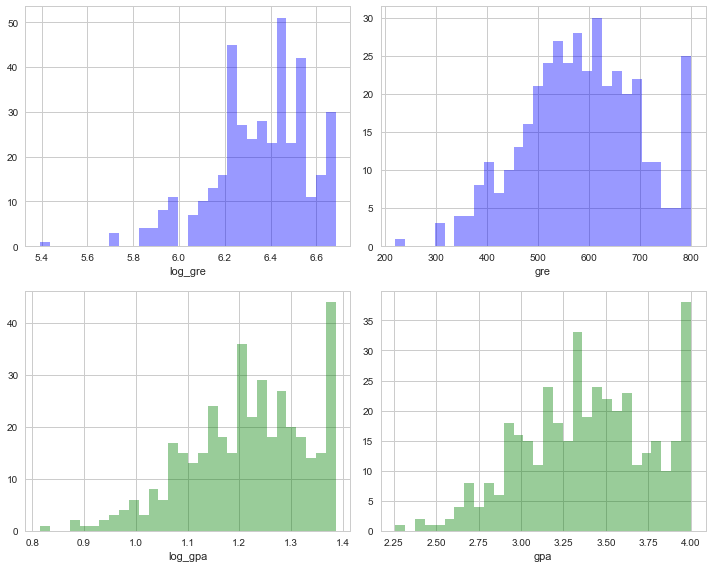

In [10]:
df_log = df[['gre','gpa']].applymap(lambda x: np.log(x))
df_log.columns = 'log_' + df_log.columns
bins = 30
kde =False
plt.rcParams['figure.figsize']=(10,8)

# Compare before and after log transform
plt.subplot(2,2,1)
sns.distplot(df_log.log_gre,bins=bins,color='blue',kde=kde)

plt.subplot(2,2,2)
sns.distplot(df.gre,bins=bins,color='blue',kde=kde)

plt.subplot(2,2,3)
sns.distplot(df_log.log_gpa,bins=bins,color='green',kde=kde)

plt.subplot(2,2,4)
sns.distplot(df.gpa,bins=bins,color='green',kde=kde)

plt.tight_layout()
plt.show()

#### 3. Advanced: Impute missing data

In [11]:
df_fillnaMean = df_raw.copy()
df_fillnaMean['gre'] = df_fillnaMean['gre'].fillna(df_raw['gre'].mean())
df_fillnaMean['gpa'] = df_fillnaMean['gpa'].fillna(df_raw['gpa'].mean())
df_fillnaMean['prestige'] = df_fillnaMean['prestige'].fillna(df_raw['prestige'].mean())

print 'Before:'
print df_raw.count()
print '\nAfter:'
print df_fillnaMean.count()

Before:
admit       400
gre         398
gpa         398
prestige    399
dtype: int64

After:
admit       400
gre         400
gpa         400
prestige    400
dtype: int64
